In [11]:
%pip install tensorflow tensorflow_hub matplotlib opencv-python kagglehub numpy pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
model = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')

In [3]:
import kagglehub

path = kagglehub.dataset_download("alexanderliao/artbench10")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Satgu\.cache\kagglehub\datasets\alexanderliao\artbench10\versions\2


In [4]:
def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels = 3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [5]:
dataset = pd.read_csv(os.path.join(path, "ArtBench-10.csv")).values

In [6]:
import os
import requests
import time

image_dir = 'Files/ArtBench-10'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

for index, row in enumerate(dataset):
    image_url = row[2]
    
    try:
        img_data = requests.get(image_url, timeout=20)
        if img_data.status_code == 200 and not os.path.exists(os.path.join(image_dir, f"{index}.jpg") ):
            with open(os.path.join(image_dir, f"{index}.jpg"), 'wb') as handler:
                handler.write(img_data.content)
            print(f"Downloaded {index}: {image_url}")
    except:
        continue

    time.sleep(0.5)

    if index > 58:
        break

In [7]:
content_image = load_img('original_3_6.png')
style_image = load_img(os.path.join(image_dir, "0.jpg"))

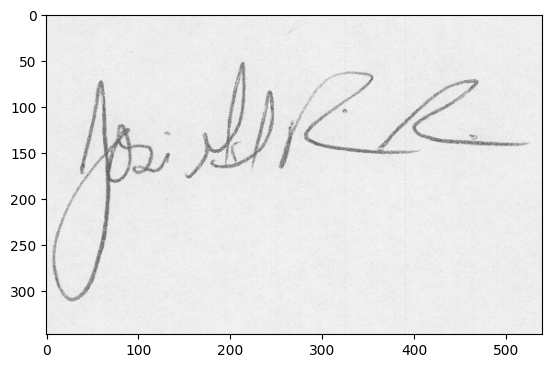

In [8]:
plt.imshow(np.squeeze(content_image))

Styling Image

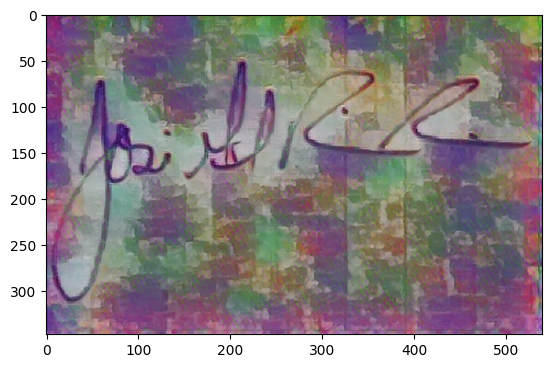

In [9]:
styled_image = model(content_image, style_image)
plt.imshow(np.squeeze(styled_image))
plt.show()

In [10]:
signatures = tf.data.Dataset.load("Files/val_data")

output = 'Files/forged'

if not os.path.exists(output):
    os.makedirs(output)

index = 0
for batch in signatures.as_numpy_iterator():
    image_batch, _ = batch

    for img in image_batch:
        content_image = tf.convert_to_tensor(img, dtype=tf.float32)
        content_image = content_image[tf.newaxis, :]
        style_image = load_img(os.path.join(image_dir, f"{index%60}.jpg"))
        styled_image = model(content_image, style_image)
        img = np.asarray(styled_image)

        index+=1
signatures.save(os.path.join("Files", "forged_data"))